<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/exercise_singlecell_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise to use hierarchical clustering and heatmaps on single-cell data

This notebook demonstrates how to perform hierarchical clustering and generate heatmaps on single-cell RNA sequencing data using the `scanpy`, `scipy`, `matplotlib`, and `seaborn` libraries.

The notebook covers the following steps:

1.  **Loading libraries**: Imports necessary libraries for data analysis and visualization.
2.  **Loading and preprocessing data**: Loads the pbmc3k dataset using `scanpy`, normalizes the total counts per cell, and applies a log1p transformation.
3.  **Selecting marker genes and subsetting data**: Defines a list of known marker genes for different cell types and creates a DataFrame containing the expression of these genes for each cell.
4.  **Computing linkages**: Calculates the hierarchical clustering linkages for both cells and genes using Euclidean distance and average linkage.
5.  **Generating a clustermap**: Uses `seaborn.clustermap` to visualize the gene expression data as a heatmap with dendrograms representing the hierarchical clustering of both cells and genes. The heatmap is colored using a diverging colormap (`vlag`) and the gene expression values are standardized across genes.

Load libraries

In [20]:
pip install scanpy scipy matplotlib pandas seaborn

In [21]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [22]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load & preprocess (same as before)
adata = sc.datasets.pbmc3k()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# 2. Marker list + subset
marker_genes = [
    'CD3D','CD3E','CD4','CD8A',  # T cells
    'CD14','LYZ',                # Monocytes
    'MS4A1',                     # B cells
    'GNLY','NKG7'                # NK cells
]
genes = [g for g in marker_genes if g in adata.var_names]
expr = pd.DataFrame(
    adata[:, genes].X.toarray(),
    index=adata.obs_names,
    columns=genes
).T

# 3. Compute linkages
cell_link = linkage(pdist(expr.T, metric='euclidean'), method='average')
gene_link = linkage(pdist(expr,   metric='euclidean'), method='average')


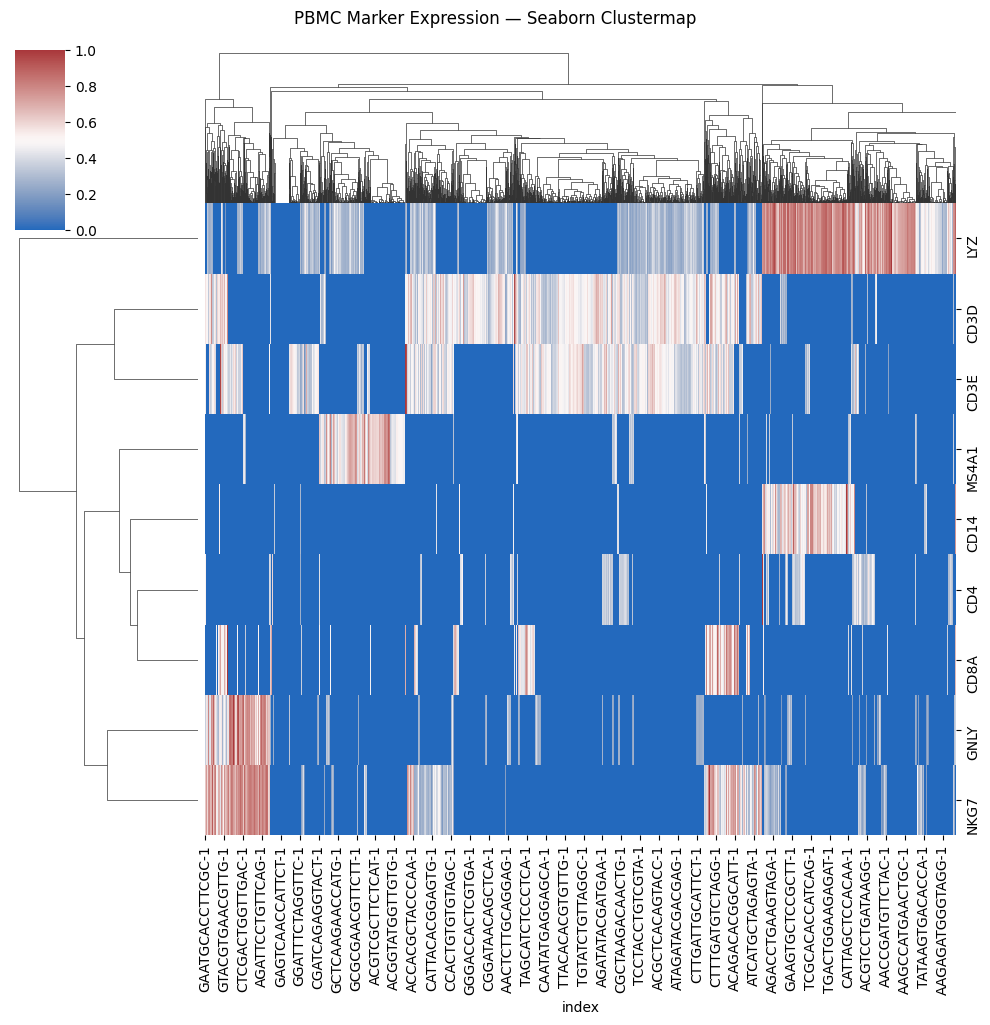

In [23]:
# seaborn clustermap does both dendrograms + heatmap in one shot
sns.clustermap(
    expr,
    row_linkage=gene_link,
    col_linkage=cell_link,
    cmap='vlag',     # blue-white-red diverging
    standard_scale=0,
    figsize=(10, 10)
)
plt.suptitle('PBMC Marker Expression — Seaborn Clustermap', y=1.02)
plt.show()
